In [1]:
!pip install pandas-profiling

In [2]:
import numpy as np  # Linear Algebra
import pandas as pd # data processing like reading of data
import matplotlib.pyplot as plt   # For plotting 
import seaborn as sns # For Plotting
import pandas_profiling as pp
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [103]:
VaccineD= pd.read_csv("train.csv")
VaccineD.head(5)

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


## Characteristics of the data


In [104]:
# The size of Data set
print('The size of the data is :', VaccineD.size)

# Show dimension of the data
print("The Dimension is: {}".format(VaccineD.shape))

The size of the data is : 40004
The Dimension is: (10001, 4)


The above shows that the size of the Dataset is 40004. This number is a product of the number of columns and rows present.

The data comprises of 4 columns and 10001 observations. 


In [106]:
#Viewing the Datatype details

VaccineD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   10001 non-null  object 
 1   safe_text  10001 non-null  object 
 2   label      10000 non-null  float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 312.7+ KB


In [107]:
#Another way of checking for missing values

VaccineD.isnull().sum()

tweet_id     0
safe_text    0
label        1
agreement    2
dtype: int64

The above shows that the Data comprises of four columns with two columns with object datatypes and two being float datatypes.

The agreement column has missing values and well as the label column with one missing value. We will do a pandas profiling report to visualize the data for a clearer picture.

There will be no need for summary statistics because our data is primarily text and not numerical

In [ ]:
profile = VaccineD.profile_report(title='Pandas Profiling Report',
                               plot={'histogram': {'bins': 8}}
                              )
profile.to_file(output_file='profileReport1.html')
profile


From the profiling report, we are also presented with warnings of 3 missing values. There are no duplicates. One from the label column, and the other from the agreement column. The Agreement column indicates the percentage of 3 reviewers who agreed on a given label. It will not be useful in our training and testing. 

In [ ]:
#Dropping the Agreement column

VaccineDat = VaccineD.drop(['agreement'],axis=1)

#Dropping rows with missing values/NaN in any column
VaccineDat = VaccineDat.dropna()

#saving new data to a new csv files
VaccineDat.to_csv('Training.csv', index =False)
VaccineDat.head()

In [8]:
#Ensuring no missing value rows exist
VaccineDat.isnull().sum()

tweet_id     0
safe_text    0
label        0
dtype: int64

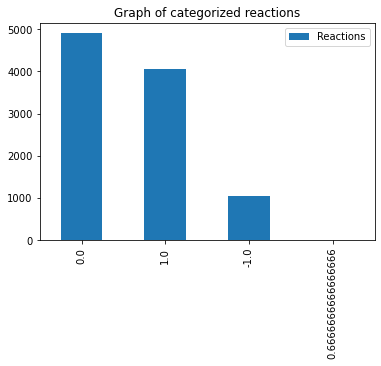

In [9]:
VaccineDat['label'].value_counts().plot(kind='bar',title='Graph of categorized reactions' ,label="Reactions")
plt.legend()
plt.savefig('Reactions.png')

In [10]:
#Deleting rows with label values not 1, -1 or 0
indexn = VaccineDat [ (VaccineDat['label']!=0) & (VaccineDat['label']!=1) & (VaccineDat['label']!=-1)] .index
                    
#or (VaccineDat['label']!=0) or (VaccineDat['label']!=-1) ].index


VaccineDat.drop(indexn, inplace = True)

<module 'matplotlib.pyplot' from 'C:\\Users\\Moses Fetuah\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

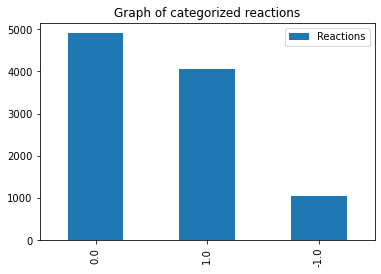

In [11]:
VaccineDat['label'].value_counts().plot(kind='bar',title='Graph of categorized reactions' ,label="Reactions")
plt.legend()
plt#.savefig('Reactions.png')

In [14]:
mood_count = VaccineDat['label'].value_counts()
mood_count

 0.0    4908
 1.0    4053
-1.0    1038
Name: label, dtype: int64

Text(0, 0.5, 'Sentiment Count')

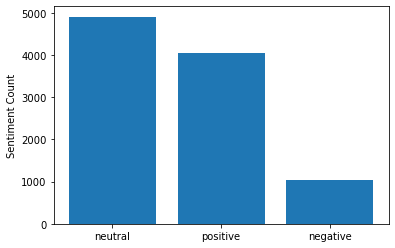

In [16]:
Index = [1,2,3]
plt.bar(Index, mood_count)
plt.xticks(Index, ['neutral', 'positive', 'negative'])
plt.ylabel('Sentiment Count')

In [19]:
df = VaccineDat[VaccineDat['label'] == -1]
df.head()

,tweet_id,safe_text,label
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0
24,89AB846O,<user> #CDC lied and hid data that black boys ...,-1.0
25,XSXFN1C8,<user> vaccines causing autism,-1.0
35,6PMH7C56,"<user> <user> Other than that, his defense is ...",-1.0


In [21]:
words = ' '.join(df['safe_text'])

In [97]:
wordcloud = WordCloud(stopwords = 
                      STOPWORDS, background_color='black', 
                      height = 2500, width = 3000).generate(words)

(-0.5, 2999.5, 2499.5, -0.5)

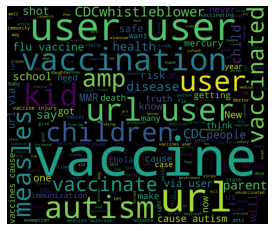

In [23]:
plt.imshow(wordcloud)
plt.axis('off')

In [36]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Moses
[nltk_data]     Fetuah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Moses
[nltk_data]     Fetuah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
!pip install clean-text

  Created wheel for ftfy: filename=ftfy-5.8-cp37-none-any.whl size=45619 sha256=2b20e6c483a64f9ac48e0b056f89ea28d8ace1f08f4eefeb38241640bd528936
  Stored in directory: C:\Users\Moses Fetuah\AppData\Local\pip\Cache\wheels\ba\c0\ef\f28c4da5ac84a4e06ac256ca9182fc34fa57fefffdbc68425b
Successfully built ftfy


In [44]:
# how many tweets contain a URL i.e. "http"?
tweets_with_URLs = df.loc[df["safe_text"].str.contains("url")]

# view the number of tweets that contain a URL
print(f"Number of tweets containing URLs: {len(tweets_with_URLs)}")

# view the tweets that contain a URL
tweets_with_URLs\
.style.set_properties(subset=['safe_text'], **{'width': '800px'}).hide_index()

Number of tweets containing URLs: 411


tweet_id,safe_text,label
ZCOLETM5,CIA: No more vaccination campaigns in spy ops via Harm from protected medic status ruse will linger,-1.000000
E88B1XQJ,Vaccine Brain Damage Cover Up Implodes: on discussing #CDCwhistleblower,-1.000000
43MWGI00,Centers for Disease Control: This Year’s Flu Vaccine Doesn’t Work #health #flu #cure #failure #sick #CDC #really?,-1.000000
85B8L54L,""" Conservative Neurosurgeon Ben Carson Says Vaccines Are A Public Health Issue 1 thing I agree with him on.",-1.000000
L2TIWPQD,NEW: Bexar Co. District Attorney Nico LaHood: 'Vaccinations can and do cause autism' by Brian Chasnoff,-1.000000
WN73MQPZ,Injuries & death from #HPV #vaccine Here's 1 article out of many from a simple Google search,-1.000000
W6NZQ79A,Parents Warned That Vaccinating Kids May Turn Them Gay via,-1.000000
4IU84GUE,“ 40% of vaccines contain aluminum; what conditions are associated with aluminum exposure? #CDCvax”,-1.000000
NAKRBNC6,"Only 14% of people in Disneyland measles outbreak were unvaccinated, but it's 100% their fault, claims propaganda",-1.000000
J1NMPFIO,“ U.N. stops Syria vaccine campaign after 15 children die,-1.000000


In [45]:
# let's find out how many tweets contain a hashtag
tweets_with_hashtags = df.loc[df["safe_text"].str.contains("#")]

# view the number of tweets that contain a hashtag
print(f"Number of tweets containing hashtags: {len(tweets_with_hashtags)}")

# view the tweets that contain a hashtag
tweets_with_hashtags\
.style.set_properties(subset=['safe_text'], **{'width': '800px'}).hide_index()  


Number of tweets containing hashtags: 292


tweet_id,safe_text,label
M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE YOUR CHILD",-1.000000
89AB846O,#CDC lied and hid data that black boys have an 340% uncreased risk of developing autism after MMR #CDCwhistleblower help!?!?,-1.000000
E88B1XQJ,Vaccine Brain Damage Cover Up Implodes: on discussing #CDCwhistleblower,-1.000000
43MWGI00,Centers for Disease Control: This Year’s Flu Vaccine Doesn’t Work #health #flu #cure #failure #sick #CDC #really?,-1.000000
DZWTVPSH,Who wants a shot of autism juice...I mean measles vaccine!? #ThingsMyDoctorSays,-1.000000
DOZBHCZ5,and the vaccine will injure tens of thousands more! #flushot,-1.000000
OA5RF3H5,Pro safety doesn't make me an anti-vaxer. It makes me an educated consumer #CDCwhistleblower #CDCfraud #MyKidMatters #VaccineInjuryIsReal,-1.000000
0FK706J2,#tmlt also I don't get a flu vaccine until I know it's safe. I'm letting the rest of the school be the guinea pigs for the vaccine. #suckers,-1.000000
0AT43JXB,there R no double - blind studies showing #vaccines work,-1.000000
WN73MQPZ,Injuries & death from #HPV #vaccine Here's 1 article out of many from a simple Google search,-1.000000


In [47]:
tweet_string = " ".join(tweet for tweet in df["safe_text"])

# view the first 200 elements of the string to check 
# this worked as expected
tweet_string[0:200]

"#whatcausesautism VACCINES, DO NOT VACCINATE YOUR CHILD I mean if they immunize my kid with something that won't secretly kill him years down the line then I'm all for it, but I don't trust that <user"

In [50]:
import re

In [51]:
# remove extra white spaces so there is only one 
# space between words
tweet_string = re.sub(r'\s+',' ', tweet_string)

# view the first 200 elements of the string to 
# check this worked as expected
tweet_string[0:200]

"#whatcausesautism VACCINES, DO NOT VACCINATE YOUR CHILD I mean if they immunize my kid with something that won't secretly kill him years down the line then I'm all for it, but I don't trust that <user"

In [52]:
# replace all the mentions (e.g. @Dilbert_Daily) 
# from the tweets with '@USER'
tweet_string = re.sub(r'@\w+','@USER ', tweet_string)

# view the first 200 elements of the string to check 
# this worked as expected
tweet_string[0:200]

"#whatcausesautism VACCINES, DO NOT VACCINATE YOUR CHILD I mean if they immunize my kid with something that won't secretly kill him years down the line then I'm all for it, but I don't trust that <user"

In [53]:
# replace all the URLs with '_URL_'
tweet_string = re.sub(r'http\S+','_URL_ ', tweet_string)

# view the first 200 elements of the string to check 
# this worked as expected
tweet_string[0:200]

"#whatcausesautism VACCINES, DO NOT VACCINATE YOUR CHILD I mean if they immunize my kid with something that won't secretly kill him years down the line then I'm all for it, but I don't trust that <user"

In [54]:
# convert the text to lower case so, for example, instead 
# of having "Be" and "be" included
# as 2 separate words, we'd only have "be"
tweet_string = tweet_string.lower()

# view the first 200 elements of the string to check 
# this worked as expected
tweet_string[0:200]

"#whatcausesautism vaccines, do not vaccinate your child i mean if they immunize my kid with something that won't secretly kill him years down the line then i'm all for it, but i don't trust that <user"

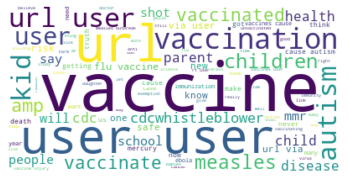

In [55]:
# create the wordcloud
tweet_wordcloud = WordCloud(background_color="white", 
                              max_words=100, 
                             ).generate(tweet_string)

# view the wordcloud
plt.imshow(tweet_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

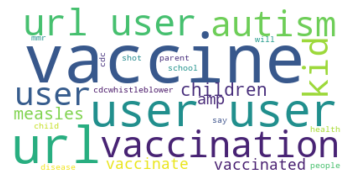

In [56]:
# create the wordcloud
tweet_wordcloud = WordCloud(background_color="white", 
                              max_words=25, 
                             ).generate(tweet_string)

# view the wordcloud
plt.imshow(tweet_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [60]:
!pip install -U spacy
import spacy   # for tokenising text
from spacy.lang.en import English  # for tokenising text
nlp = English()   # for tokenising text
from collections import Counter 

In [64]:
# create a spacy document by pointing spacy to the 
# tweet string
tweet_doc = nlp(tweet_string)

# get all tokens that aren't punctuation
tweet_words = [token.text for token in tweet_doc if token.is_punct != True]

# get the frequency of each word (token) in the tweet string
tweet_word_freq = Counter(tweet_words)

# get the 5 most frequent words
five_most_common_words = tweet_word_freq.most_common(5)

# view the 5 most common words
five_most_common_words

[('>', 1272), ('<', 1252), ('user', 809), ('the', 505), ('url', 443)]

In [65]:
# create a Pandas dataframe containing the tokens 
# (words) and their frequencies
freq_df = pd.DataFrame.from_dict(tweet_word_freq, orient='index').reset_index()

# rename the columns to "word" and "freq"
freq_df.columns=["word", "freq"]

# sort the dataframe so that the most frequent word is 
# at the top and view the first 3 rows
freq_df.sort_values(by="freq", ascending=False).head(3)

,word,freq
35,>,1272
33,<,1252
34,user,809


In [66]:
import seaborn as sns

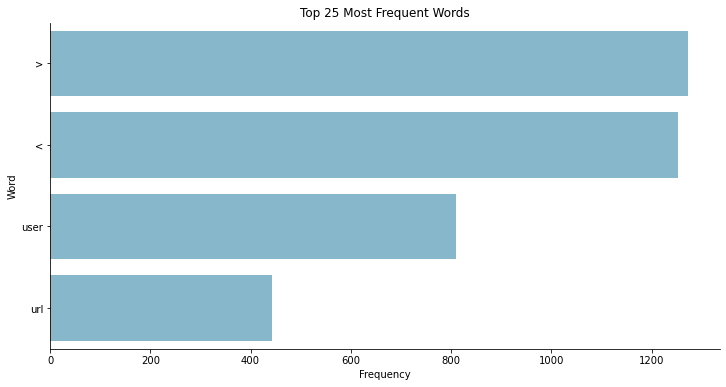

In [74]:
# display a bar chart showing the top 25 words 
# and their frequencies
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=freq_df.sort_values(by="freq", ascending=False).head(4), 
            y="word", 
            x="freq", 
            color='#7bbcd5')
plt.ylabel("Word")
plt.xlabel("Frequency")
plt.title("Top 25 Most Frequent Words")
sns.despine();

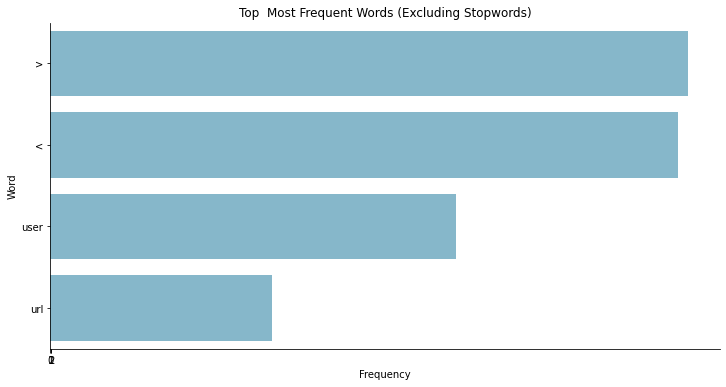

In [83]:
# get all tokens that aren't punctuation 
# and aren't stopwords
tweet_words = [token.text for token in tweet_doc if token.is_punct != True and \
token.is_stop != True]

# get the frequency of each word (token) in the tweet string
tweet_word_freq = Counter(tweet_words)

# re-create the Pandas dataframe containing the 
# tokens (words) and their frequencies
freq_df = pd.DataFrame.from_dict(tweet_word_freq, orient='index').reset_index()

# rename the columns to "word" and "freq"
freq_df.columns=["word", "freq"]

# display a bar chart showing the top 25 words and their
# frequencies (which will exclude the stopwords this time)
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=freq_df.sort_values(by="freq", ascending=False).head(4), 
            y="word", 
            x="freq", 
            color='#7bbcd5')
plt.ylabel("Word")
plt.xlabel("Frequency")
plt.title("Top  Most Frequent Words (Excluding Stopwords)")
plt.xticks([0,1,2])
sns.despine();

In [91]:
!pip install -U gensim

  Created wheel for smart-open: filename=smart_open-2.1.1-cp37-none-any.whl size=112420 sha256=ae0617092b5f17dd7390cc43a990fda115094273987de7dcd4a57ed3773107c1
  Stored in directory: C:\Users\Moses Fetuah\AppData\Local\pip\Cache\wheels\17\49\ea\74939572d8d071ff3c63a98e3e8dadef1117cc93c33efaa504
Successfully built smart-open
  Found existing installation: Cython 0.29.13
    Uninstalling Cython-0.29.13:
      Successfully uninstalled Cython-0.29.13


In [102]:
from gensim.parsing.preprocessing import STOPWORDS

all_stopwords_gensim = STOPWORDS.union(set(['url', 'user', '#', '<', '>']))

#text = "Nick likes to play football, however he is not too fond of tennis."
text_tokens = word_tokenize(tweet_string)
tokens_without_sw = [word for word in text_tokens if not word in all_stopwords_gensim]

print(tokens_without_sw)

TypeError: expected string or bytes-like object

In [95]:
# create the wordcloud
tweet_wordcloud = WordCloud(background_color="white", 
                              max_words=100, 
                             ).generate(tokens_without_sw)

# view the wordcloud
plt.imshow(tweet_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

TypeError: expected string or bytes-like object

In [82]:
freq_df

,word,freq
0,whatcausesautism,1
1,vaccines,327
2,vaccinate,76
3,child,61
4,mean,5
...,...,...
3141,kno,1
3142,proper,1
3143,share,1
3144,illegals,1


In [15]:
# Relevant Libraries
import numpy as np
import re
import pickle
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Moses
[nltk_data]     Fetuah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Moses
[nltk_data]     Fetuah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [86]:
# Separate features and the target

V_feature = VaccineDat['safe_text']
V_target = VaccineDat['label']

X, y = V_feature.values, V_target.values

In [87]:
# Text Preprocessing

tweet = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for atweet in range(0, len(X)):
    # Remove all the special characters
    tweets = re.sub(r'\W', ' ', str(X[atweet]))
    
    # Remove single characters from the start
    tweets = re.sub(r'\^[a-zA-Z]\s+', ' ', tweets) 
    
    # Removing URLs
    tweets = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','<url>', tweets)
    tweets = re.sub('<url>',' ', tweets)
    
    # Removing usernames
    tweets = re.sub('@[^\s]+','<user>', tweets)
    tweets = re.sub('<user>',' ', tweets)
    
    # Removing the # in #hashtag
    tweets = re.sub(r'#([^\s]+)', r'\1', tweets)
    
    # Remove all single characters
    tweets = re.sub(r'\s+[a-zA-Z]\s+', ' ', tweets)
    
    # Removing repeated characters (helloooooooo into hello)
#     tweets = word_tokenize(tweets)
    
    # Substituting multiple spaces with single space
    tweets = re.sub(r'\s+', ' ', tweets, flags=re.I)
    
    # Converting to Lowercase
    tweets = tweets.lower()
    
    # Lemmatization
    tweets = tweets.split()

    tweets = [stemmer.lemmatize(word) for word in tweets]
    tweets = ' '.join(tweets)
    
    tweet.append(tweets)


In [88]:
tweet

['me amp the big homie meanboy3000 meanboy mb mb mmr stegmanlife stegman st url',
 'i 100 thinking of devoting my career to proving autism isn caused by vaccine due to the idiotic post ve seen about world autism day',
 'whatcausesautism vaccine do not vaccinate your child',
 'i mean if they immunize my kid with something that won secretly kill him year down the line then m all for it but don trust that',
 'thanks to user catch me performing at la nuit nyc 1134 1st ave show start at 6 jennifair mmr url',
 'user nearly 67 year old study when mental health study and vaccine were relatively in their infancy that ha been refuted',
 'study of more than 95 000 kid find no link between mmr vaccine and autism url',
 'psa vaccinate your fucking kid',
 'coughing extra on the shuttle and everyone think have the measles vaccinateyourkids',
 'aid vaccine created at oregon health amp science university may clear virus from body url url',
 'user this point have 2 text butw bon jovi cover playin alibi 

In [40]:
# Term frequency = (Number of Occurrences of a word)/(Total words in the document)
# IDF(word) = Log((Total number of documents)/(Number of documents containing the word))

from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))

tweet#X = tfidfconverter.fit_transform(tweet).toarray()

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0'

AttributeError: 'list' object has no attribute 'replace'

In [35]:
X

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

NameError: name 'remove' is not defined

In [38]:
tweet

['0 0 0 0 0 0',
 '0 0 0 32260335 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 40515621 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 2925305 0 0 0 0',
 '0 0 0 0 0 0 37904164',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0 0 0 0 0',
 '0 0